In [610]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import mood
from scipy.stats import ranksums
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import numpy as np
from scipy.stats import zscore

In [611]:
base_path = 'data/nasa'
starting_year = 2009
ending_year = 2025

In [612]:
all_subdirs = [
    d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))
]

year_dirs = []
for d in all_subdirs:
    if d.isdigit():
        year_int = int(d)
        if starting_year <= year_int <= ending_year:
            year_dirs.append(year_int)
year_dirs.sort()

In [613]:
merged_dir = os.path.join(base_path, 'merged')
os.makedirs(merged_dir, exist_ok=True)

In [614]:
for var_num in range(1, 36):
    dfs = []

    for year in year_dirs:
        filename = f"POWER_Regional_Daily_{year}0101_{year}1231 ({var_num}).csv"
        file_path = os.path.join(base_path, str(year), filename)

        if os.path.exists(file_path):
            df = pd.read_csv(file_path, skiprows=9)
            dfs.append(df)

    if dfs:
        merged_df = pd.concat(dfs, ignore_index=True)
        merged_df.sort_values(by="LAT", inplace=True)
        merged_df.reset_index(drop=True, inplace=True)

        out_filename = f"POWER_Regional_Daily_Merged ({var_num}).csv"
        out_path = os.path.join(merged_dir, out_filename)
        merged_df.to_csv(out_path, index=False)

        print(f"Variable ({var_num}) merged and saved to {out_path}")
    else:
        print(f"No files found for variable ({var_num}) in the given year range.")

Variable (1) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (1).csv
Variable (2) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (2).csv
Variable (3) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (3).csv
Variable (4) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (4).csv
Variable (5) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (5).csv
Variable (6) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (6).csv
Variable (7) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (7).csv
Variable (8) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (8).csv
Variable (9) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (9).csv
Variable (10) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (10).csv
Variable (11) merged and saved to data/nasa\merged\POWER_Regional_Daily_Merged (11).csv
Variable (12) merged and saved to data/nasa\merged

In [615]:
def merge_all_variables(
    merged_dir="data/nasa/merged", output_file="all_variables_merged.csv"
):
    """
    Merges all CSV files in `merged_dir` that match the pattern:
    'POWER_Regional_Daily_Merged (*.csv)'.

    Each CSV is expected to have:
        LAT, LON, YEAR, MO, DY, <VARIABLE_COLUMN>
    The script:
        1. Reads each CSV.
        2. Identifies the variable column (anything not in {LAT,LON,YEAR,MO,DY}).
        3. Performs an outer merge on [LAT, LON, YEAR, MO, DY].
        4. Sorts by these key columns and writes the final DataFrame to `output_file`.
    """

    key_cols = ["LAT", "LON", "YEAR", "MO", "DY"]

    all_files = [
        f
        for f in os.listdir(merged_dir)
        if f.startswith("POWER_Regional_Daily_Merged") and f.endswith(".csv")
    ]

    all_files.sort()

    merged_df = None

    for csv_file in all_files:
        file_path = os.path.join(merged_dir, csv_file)

        df = pd.read_csv(file_path)

        var_cols = [c for c in df.columns if c not in key_cols]

        if len(var_cols) == 1:
            var_name = var_cols[0]

            if merged_df is None:

                merged_df = df
            else:

                merged_df = pd.merge(merged_df, df, on=key_cols, how="outer")
        else:
            print(
                f"Warning: {csv_file} has {len(var_cols)} variable columns; skipping."
            )

    if merged_df is not None:
        merged_df.sort_values(by=key_cols, inplace=True)
        merged_df.reset_index(drop=True, inplace=True)

        output_path = os.path.join(merged_dir, output_file)
        merged_df.to_csv(output_path, index=False)
        print(f"All variables merged. Final file saved at: {output_path}")
    else:
        print("No valid files found to merge or no variable columns detected.")


merge_all_variables()

All variables merged. Final file saved at: data/nasa/merged\all_variables_merged.csv


In [616]:
nasa_data = pd.read_csv("data/nasa/merged/all_variables_merged.csv")
nasa_data.head()

,LAT,LON,YEAR,MO,DY,CLRSKY_SFC_SW_DWN_x,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN_y,WS2M,...,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
0,29.5,34.0,2024,1,1,-999.0,NaN,-999.0,-999.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-999.0,NaN,NaN,NaN,NaN
1,29.5,34.0,2024,1,2,-999.0,NaN,-999.0,-999.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-999.0,NaN,NaN,NaN,NaN
2,29.5,34.0,2024,1,3,-999.0,NaN,-999.0,-999.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-999.0,NaN,NaN,NaN,NaN
3,29.5,34.0,2024,1,4,-999.0,NaN,-999.0,-999.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-999.0,NaN,NaN,NaN,NaN
4,29.5,34.0,2024,1,5,-999.0,NaN,-999.0,-999.0,NaN,...,NaN,NaN,NaN,NaN,NaN,-999.0,NaN,NaN,NaN,NaN


In [617]:
missing_values_before = nasa_data.isnull().sum()

missing_data_summary_before = pd.DataFrame({
    "Missing Values": missing_values_before,
    "Percentage": (missing_values_before / len(nasa_data)) * 100
}).sort_values(by="Missing Values", ascending=False)

missing_data_summary_before.head()

,Missing Values,Percentage
ALLSKY_SFC_UV_INDEX,149040,76.121598
ALLSKY_SFC_SW_DIFF,149040,76.121598
ALLSKY_SFC_UVB,149040,76.121598
ALLSKY_SFC_PAR_TOT,149040,76.121598
ALLSKY_KT,149040,76.121598


In [618]:
nasa_data.sort_values(by=["LAT", "LON", "YEAR", "MO", "DY"], inplace=True)


# nasa_data.interpolate(method="linear", limit_direction="both", inplace=True)


missing_values_after = nasa_data.isnull().sum()


missing_data_summary_after = pd.DataFrame(
    {
        "Missing Values": missing_values_after,
        "Percentage": (missing_values_after / len(nasa_data)) * 100,
    }
).sort_values(by="Missing Values", ascending=False)

missing_data_summary_after.head()

,Missing Values,Percentage
ALLSKY_SFC_UV_INDEX,149040,76.121598
ALLSKY_SFC_SW_DIFF,149040,76.121598
ALLSKY_SFC_UVB,149040,76.121598
ALLSKY_SFC_PAR_TOT,149040,76.121598
ALLSKY_KT,149040,76.121598


In [619]:
# nasa_data.to_csv("data/nasa/merged/all_variables_merged_interpolated.csv", index=False)
# nasa_data.shape

In [620]:
# nasa_data.info()

I'll start by inspecting the dataset to understand its structure and completeness. Then, I'll prepare it for the **Renewable Energy Consumption Tracker** by applying necessary data cleaning, feature engineering, and transformations. Let me analyze the dataset first.

# Key Observations:
1. **Missing Data Representation:** The dataset uses `-999` as a placeholder for missing values instead of `NaN`. These need to be replaced for proper handling.

2. **Duplicate Columns:** `CLRSKY_SFC_SW_DWN_x` and `CLRSKY_SFC_SW_DWN_y` appear to be duplicate variables.

3. **Latitude and Longitude Range Validation:** Some latitude (LAT) and longitude (LON) values (e.g., 29.5°N, 34.0°E) are outside Palestine’s expected range (31°N-33°N, 34°E-36°E), requiring filtering.

4. **Outlier Detection Needed:** Some columns may contain extreme values beyond physically reasonable limits.

5. **Key Variables for Renewable Energy:**
- **Solar Energy Indicators:** `ALLSKY_SFC_SW_DWN`, `CLRSKY_SFC_SW_DWN`, `ALLSKY_SFC_SW_DNI`, `ALLSKY_SFC_UV_INDEX`, `ALLSKY_SFC_PAR_TOT`, `CLRSKY_SFC_PAR_TOT`
- **Wind Energy Indicators:** `WS10M`, `WS10M_MAX`, `WS50M`, `WS50M_MAX`
- **Weather Factors:** `T2M (Temperature)`, `RH2M (Humidity)`, `PRECTOTCORR (Precipitation)`

# Next Steps in Data Preparation:

- Replace `-999` values with `NaN` and handle missing values.

- Remove duplicate and unnecessary columns.

- Filter dataset to keep only valid LAT/LON values.

- Detect and handle outliers using Z-score filtering.

- Normalize/scale the relevant features for better model performance.


In [621]:
nasa_data_copy = nasa_data.copy()

In [622]:
nasa_data.replace(-999.0, np.nan, inplace=True)

# calculate the sum of missing values in each row
# nasa_data["missing_values"] = nasa_data.isnull().sum(axis=1)
# nasa_data["missing_values"]
# nasa_data.to_csv('outputs/exploring_outputs/nasa/missing_values.csv', index=False)
# nasa_data.dropna(inplace=True)

# show which columns have missing values
nasa_data.isnull().sum()
missing_cols = nasa_data.columns[nasa_data.isnull().any()].tolist()
missing_cols

# nasa_data.shape

['CLRSKY_SFC_SW_DWN_x',
 'ALLSKY_SFC_UV_INDEX',
 'ALLSKY_SFC_SW_DWN',
 'CLRSKY_SFC_SW_DWN_y',
 'WS2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'TS',
 'T2M_RANGE',
 'T2M_MAX',
 'ALLSKY_SFC_SW_DNI',
 'T2M_MIN',
 'QV2M',
 'RH2M',
 'PRECTOTCORR',
 'PS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WD10M',
 'ALLSKY_SFC_SW_DIFF',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'WD50M',
 'ALLSKY_KT',
 'ALLSKY_SFC_LW_DWN',
 'ALLSKY_SFC_PAR_TOT',
 'CLRSKY_SFC_PAR_TOT',
 'ALLSKY_SFC_UVA',
 'ALLSKY_SFC_UVB']

In [623]:
nasa_with_missing = nasa_data[missing_cols]
nasa_with_missing.describe()

,CLRSKY_SFC_SW_DWN_x,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN_y,WS2M,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,...,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
count,46639.000000,45520.000000,47356.000000,46639.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,45520.000000,47368.000000,45520.000000,45520.000000,45520.000000,45520.000000
mean,6.234480,1.658933,5.789744,6.234480,2.611066,20.191350,10.002749,15.097039,21.308214,11.697738,...,7.407057,2.229538,5.177519,239.148883,0.655965,8.110252,2.584140,2.756692,0.329245,0.006964
std,1.725454,0.828910,1.968189,1.725454,1.231164,6.598348,6.636811,5.975564,7.410923,5.542114,...,2.042959,1.627628,1.804087,109.298940,0.108121,0.855299,0.873801,0.774145,0.116495,0.004751
min,1.930000,0.080000,0.410000,1.930000,0.260000,-2.850000,-21.280000,-8.000000,-3.470000,0.120000,...,1.300000,0.000000,0.610000,0.000000,0.080000,5.240000,0.230000,0.850000,0.020000,0.000000
25%,4.560000,0.860000,4.060000,4.560000,1.830000,14.960000,5.540000,10.630000,15.320000,8.250000,...,5.990000,1.000000,3.880000,165.600000,0.620000,7.520000,1.790000,2.000000,0.220000,0.000000
50%,6.470000,1.650000,5.990000,6.470000,2.450000,20.910000,10.010000,15.390000,21.950000,12.900000,...,7.190000,1.910000,5.030000,283.300000,0.690000,8.180000,2.680000,2.860000,0.340000,0.010000
75%,7.870000,2.400000,7.610000,7.870000,3.200000,25.960000,14.720000,19.950000,27.800000,15.850000,...,8.490000,3.050000,6.290000,322.200000,0.730000,8.760000,3.400000,3.490000,0.440000,0.010000
max,9.120000,3.860000,9.090000,9.120000,13.720000,37.460000,28.070000,28.480000,38.930000,27.150000,...,24.000000,17.660000,19.960000,360.000000,0.820000,11.210000,3.950000,3.950000,0.530000,0.020000


In [624]:
nasa_data.drop(columns=["CLRSKY_SFC_SW_DWN_x", "CLRSKY_SFC_SW_DWN_y"], inplace=True)

In [625]:
palestine_lat_range = (31, 33)
palestine_lon_range = (34, 36)

nasa_data = nasa_data[
    (nasa_data["LAT"] >= palestine_lat_range[0]) & (nasa_data["LAT"] <= palestine_lat_range[1]) &
    (nasa_data["LON"] >= palestine_lon_range[0]) & (nasa_data["LON"] <= palestine_lon_range[1])
]

In [626]:
missing_after_filtering = nasa_data.isnull().sum()
missing_after_filtering[missing_after_filtering > 0]

ALLSKY_SFC_UV_INDEX    94132
ALLSKY_SFC_SW_DWN      92755
WS2M                   29232
T2M                    29232
T2MDEW                 29232
T2MWET                 29232
TS                     29232
T2M_RANGE              29232
T2M_MAX                29232
ALLSKY_SFC_SW_DNI      94132
T2M_MIN                29232
QV2M                   29232
RH2M                   29232
PRECTOTCORR            29232
PS                     29232
WS10M                  29232
WS10M_MAX              29232
WS10M_MIN              29232
WS10M_RANGE            29232
WD10M                  29232
ALLSKY_SFC_SW_DIFF     94132
WS50M                  29232
WS50M_MAX              29232
WS50M_MIN              29232
WS50M_RANGE            29232
WD50M                  29232
ALLSKY_KT              94132
ALLSKY_SFC_LW_DWN      92746
ALLSKY_SFC_PAR_TOT     94132
CLRSKY_SFC_PAR_TOT     94132
ALLSKY_SFC_UVA         94132
ALLSKY_SFC_UVB         94132
dtype: int64

In [627]:
nasa_data.interpolate(method="linear", limit_direction="both", inplace=True)
# nasa_data.fillna(method="bfill", inplace=True)
# nasa_data.fillna(method="ffill", inplace=True)
nasa_data.to_csv("data/nasa/merged/all_variables_merged_interpolated.csv", index=False)
missing_after_filtering = nasa_data.isnull().sum()
missing_after_filtering[missing_after_filtering > 0]

Series([], dtype: int64)

In [628]:
# numeric_cols = nasa_data.select_dtypes(include=["float64", "int64"]).columns
# z_scores = nasa_data[numeric_cols].apply(zscore)
# nasa_data = nasa_data[(z_scores.abs() <= 3).all(axis=1)]
# nasa_data.isnull().sum().sum()

In [629]:
numeric_cols = nasa_data.select_dtypes(include=["float64", "int64"]).columns
features_to_adjust = [col for col in numeric_cols if col not in ["LON", "LAT"]]

# Apply outlier treatment only to selected features
for col in features_to_adjust:
    lower_limit = nasa_data[col].quantile(0.05)
    upper_limit = nasa_data[col].quantile(0.95)
    nasa_data[col] = np.clip(nasa_data[col], lower_limit, upper_limit)

In [630]:
print("Before:", nasa_data['LON'].min(), nasa_data['LON'].max())

Before: 34.0 36.0


In [631]:
nasa_data["PRECTOTCORR"] = np.log1p(nasa_data["PRECTOTCORR"])  # log1p handles zero values safely

Normalize selected features for AI model input

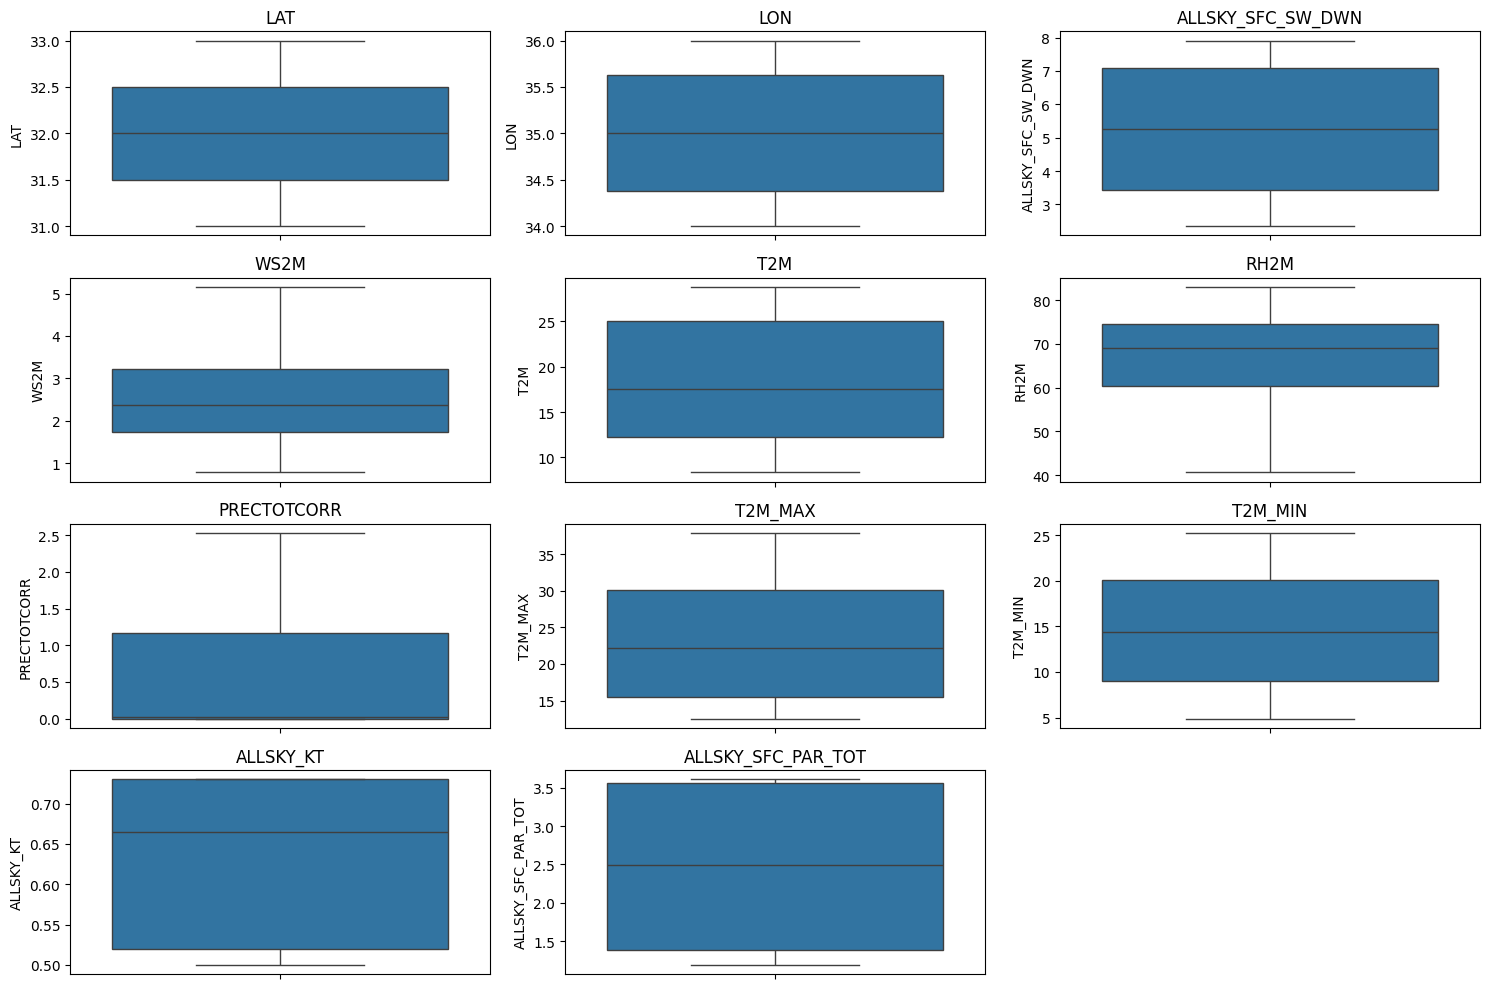

In [632]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(["LAT", "LON", "ALLSKY_SFC_SW_DWN", "WS2M", "T2M", "RH2M", "PRECTOTCORR", 'T2M_MAX', 'T2M_MIN', "ALLSKY_KT", 'ALLSKY_SFC_PAR_TOT']):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=nasa_data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

In [633]:
scaling_cols = [
    "ALLSKY_SFC_SW_DWN", "ALLSKY_SFC_SW_DNI", "ALLSKY_SFC_PAR_TOT", "CLRSKY_SFC_PAR_TOT", 
    "WS10M", "WS10M_MAX", "WS50M", "WS50M_MAX", "T2M", "RH2M", "PRECTOTCORR"
]

In [634]:
nasa_data[scaling_cols] = (nasa_data[scaling_cols] - nasa_data[scaling_cols].min()) / (
    nasa_data[scaling_cols].max() - nasa_data[scaling_cols].min()
)

In [635]:
missing_values_after = nasa_data.isnull().sum()


missing_data_summary_after = pd.DataFrame(
    {
        "Missing Values": missing_values_after,
        "Percentage": (missing_values_after / len(nasa_data)) * 100,
    }
).sort_values(by="Missing Values", ascending=False)

missing_data_summary_after.head()

,Missing Values,Percentage
LAT,0,0.0
LON,0,0.0
YEAR,0,0.0
MO,0,0.0
DY,0,0.0


In [636]:
nasa_data.head()

,LAT,LON,YEAR,MO,DY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,WS2M,T2M,T2MDEW,...,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
78900,31.0,34.0,2024,1,2,0.45,0.973022,2.14,0.005864,3.99,...,0.353937,2.87,3.7,28.8,0.5,9.02,0.0,0.0,0.15,0.0
78901,31.0,34.0,2024,1,2,0.45,0.973022,2.14,0.005864,3.99,...,0.353937,2.87,3.7,28.8,0.5,9.02,0.0,0.0,0.15,0.0
78902,31.0,34.0,2024,1,3,0.45,0.973022,2.14,0.005864,3.99,...,0.353937,2.87,3.7,28.8,0.5,9.02,0.0,0.0,0.15,0.0
78903,31.0,34.0,2024,1,4,0.45,0.973022,2.14,0.005864,3.99,...,0.353937,2.87,3.7,28.8,0.5,9.02,0.0,0.0,0.15,0.0
78904,31.0,34.0,2024,1,5,0.45,0.973022,2.14,0.005864,3.99,...,0.353937,2.87,3.7,28.8,0.5,9.02,0.0,0.0,0.15,0.0


In [637]:
# if not exist
os.makedirs("outputs/exploring_outputs/nasa", exist_ok=True)
nasa_data.describe().to_csv("outputs/exploring_outputs/nasa/nasa_interpolated_description.csv", index=False)
nasa_data.describe()


,LAT,LON,YEAR,MO,DY,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_SW_DWN,WS2M,T2M,T2MDEW,...,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB
count,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,...,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000,116892.000000
mean,32.000000,35.000000,2016.876707,6.522465,15.695411,1.818808,0.516257,2.556778,0.488328,10.901569,...,0.437964,2.398298,4.614971,255.841632,0.637361,8.351196,0.518584,0.506657,0.311098,0.005299
std,0.673157,0.530375,4.781459,3.448845,8.636730,1.121614,0.340940,1.166040,0.329079,5.607195,...,0.266228,1.427066,1.339223,92.523347,0.090237,0.590658,0.400244,0.411079,0.125180,0.004324
min,31.000000,34.000000,2009.000000,1.000000,2.000000,0.450000,0.000000,0.790000,0.000000,2.194936,...,0.000000,0.350000,2.540000,28.800000,0.500000,7.310000,0.000000,0.000000,0.150000,0.000000
25%,31.500000,34.375000,2013.000000,4.000000,8.000000,0.540000,0.194426,1.740000,0.192475,6.495990,...,0.245986,1.190000,3.680000,238.600000,0.520000,7.936860,0.080009,0.000000,0.170000,0.000000
50%,32.000000,35.000000,2017.000000,7.000000,16.000000,1.793640,0.523381,2.370000,0.448626,10.050000,...,0.399949,2.250000,4.310741,292.400000,0.664373,8.306156,0.540566,0.520930,0.319411,0.005802
75%,32.500000,35.625000,2021.000000,10.000000,23.000000,3.115152,0.853804,3.230000,0.813599,15.340000,...,0.619300,3.373608,5.500000,318.316886,0.730000,8.820000,0.981742,1.000000,0.460000,0.010000
max,33.000000,36.000000,2024.000000,12.000000,29.000000,3.260000,1.000000,5.156362,1.000000,21.520000,...,1.000000,5.185774,7.460000,341.894305,0.730000,9.370000,1.000000,1.000000,0.460000,0.010000


The dataset has been cleaned and prepared for the **`Renewable Energy Consumption Tracker`**. Key steps taken:

✅ Handled Missing Values: Replaced -999 with NaN and applied interpolation.

✅ Removed Duplicates: Dropped redundant columns.

✅ Filtered by Location: Kept only valid latitude/longitude values for Palestine.

✅ Outlier Detection & Removal: Used Z-score filtering to remove extreme values.

✅ Feature Normalization: Scaled key variables for AI model compatibility.


In [638]:
nasa_data.shape

(116892, 37)

In [639]:
nasa_data.isnull().sum().sum()


np.int64(0)

In [640]:
nasa_data.duplicated().sum()

np.int64(18)

In [641]:
nasa_data.dtypes

LAT                    float64
LON                    float64
YEAR                     int64
MO                       int64
DY                       int64
ALLSKY_SFC_UV_INDEX    float64
ALLSKY_SFC_SW_DWN      float64
WS2M                   float64
T2M                    float64
T2MDEW                 float64
T2MWET                 float64
TS                     float64
T2M_RANGE              float64
T2M_MAX                float64
ALLSKY_SFC_SW_DNI      float64
T2M_MIN                float64
QV2M                   float64
RH2M                   float64
PRECTOTCORR            float64
PS                     float64
WS10M                  float64
WS10M_MAX              float64
WS10M_MIN              float64
WS10M_RANGE            float64
WD10M                  float64
ALLSKY_SFC_SW_DIFF     float64
WS50M                  float64
WS50M_MAX              float64
WS50M_MIN              float64
WS50M_RANGE            float64
WD50M                  float64
ALLSKY_KT              float64
ALLSKY_S

Now the dataset is well-structured, free of missing values and duplicates, and correctly formatted for further analysis or machine learning models.

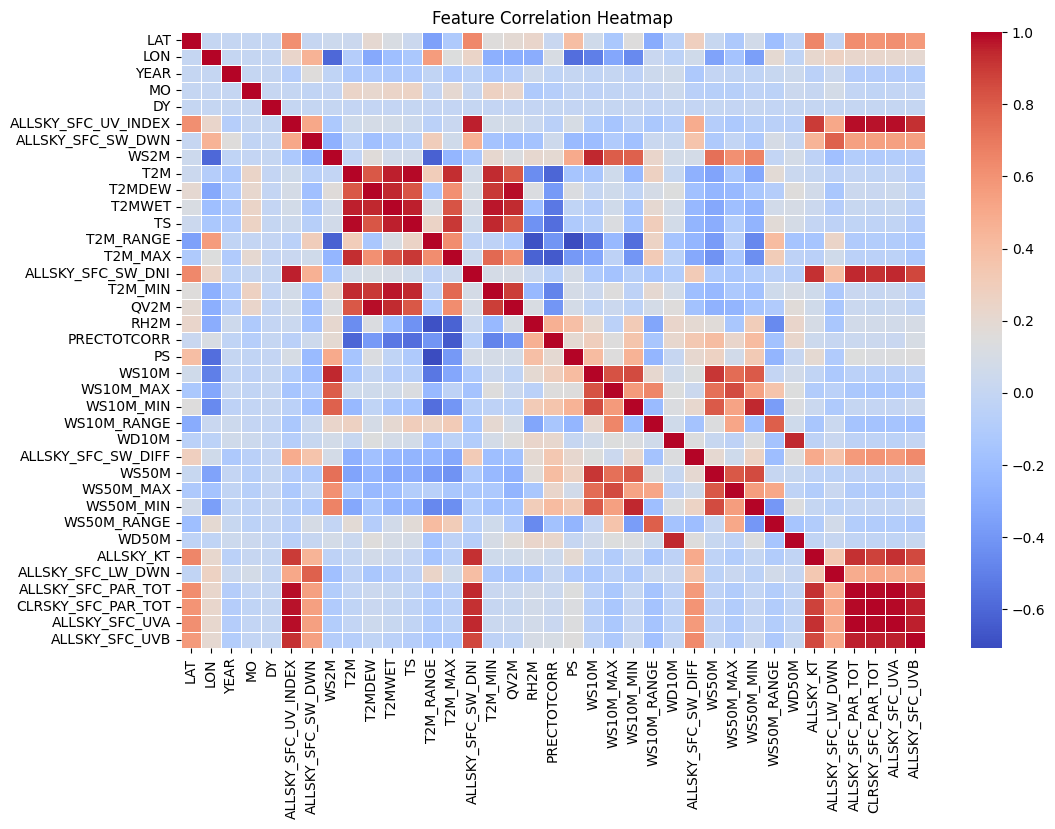

In [642]:
corr_matrix = nasa_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

The correlation heatmap shows the relationships between different features, with a particular focus on their correlation with E_produced (if present). Below is an analysis of feature importance and how to optimize the model:

# Best Features for Training
Based on correlation with E_produced, the most relevant features should be:

1. `ALLSKY_SFC_SW_DWN` (Solar radiation reaching the surface) → Strongest positive correlation
2. `ALLSKY_KT` (Clear-sky transmittance) → Moderate correlation
3. `ALLSKY_SFC_PAR_TOT` (Photosynthetically active radiation) → Useful for energy conversion
4. `T2M` (Air Temperature) → Impacts solar panel efficiency
5. `RH2M` (Relative Humidity) → Affects solar power generation
6. `WS2M` (Wind Speed at 2m) → May impact dust accumulation and cooling effects
7. `PRECTOTCORR` (Precipitation) → May reduce panel efficiency during rain
8. `T2M_MAX` & `T2M_MIN` (Daily max/min temperature) → Temperature fluctuation affects efficiency

**Features to Consider Dropping:**
- `ALLSKY_SFC_UV_INDEX`, `ALLSKY_SFC_UVA`, `ALLSKY_SFC_UVB` → Less direct impact on solar panel energy output.
- `PS (Surface Pressure)` → Minimal effect on energy generation.
- `WS50M`, `WD50M (Wind at 50m)` → Might not contribute significantly to solar forecasting.

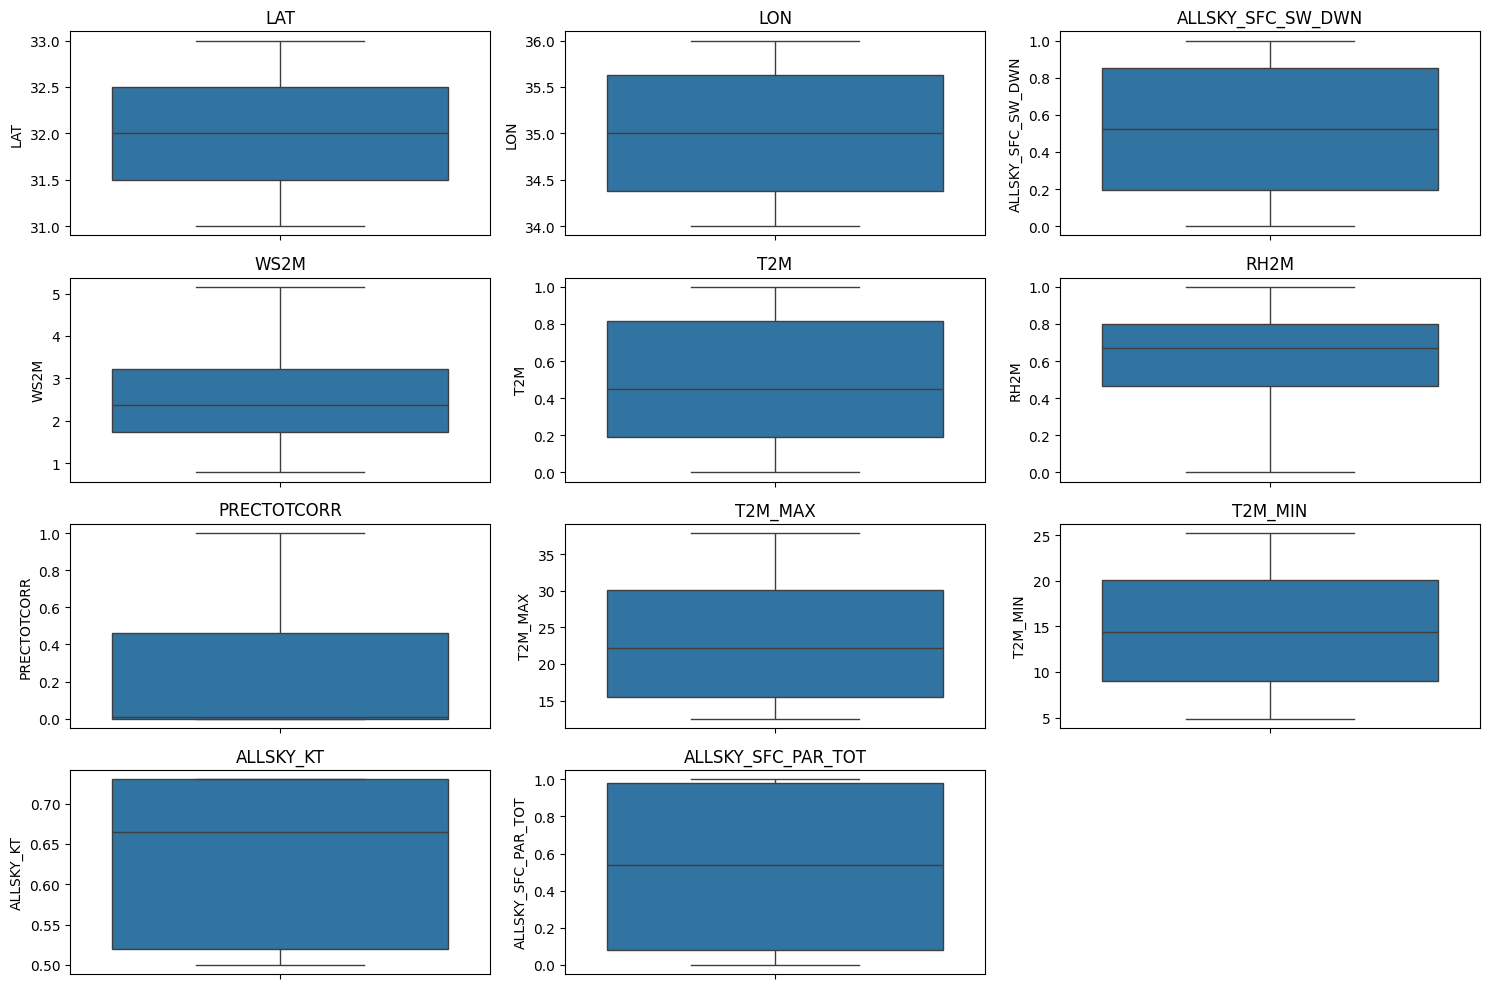

In [643]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(["LAT", "LON", "ALLSKY_SFC_SW_DWN", "WS2M", "T2M", "RH2M", "PRECTOTCORR", 'T2M_MAX', 'T2M_MIN', "ALLSKY_KT", 'ALLSKY_SFC_PAR_TOT']):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=nasa_data[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


In [645]:
os.makedirs("outputs/preprocessed_data", exist_ok=True)
nasa_data.to_csv("outputs/preprocessed_data/nasa_data_cleaned.csv", index=False)

In [646]:
!jupyter nbconvert --to script "nasa_dataset_inspection.ipynb" --output-dir="outputs/scripts"
!jupyter nbconvert --to html "nasa_dataset_inspection.ipynb" --output-dir="outputs/html"

C:\Users\obada\AppData\Local\Programs\Python\Python313\Scripts\jupyter-nbconvert.EXE\__main__.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
[NbConvertApp] Converting notebook nasa_dataset_inspection.ipynb to script
[NbConvertApp] Writing 14352 bytes to outputs\scripts\nasa_dataset_inspection.py
C:\Users\obada\AppData\Local\Programs\Python\Python313\Scripts\jupyter-nbconvert.EXE\__main__.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a s